This code overlays different image results as different colors blended with the original photos.

`subset/` has `.npy` files for a small 4096x4096 mosaic of different kinds of analysis.

In [1]:
import numpy as np
from utils.mosaic import *
from utils.imutil import *

detectron = make_mosaic(np.load('subset/detectron/images.npy'))
saliency = make_mosaic(np.load('subset/saliency/images.npy'))
depth = make_mosaic(np.load('subset/depth/images.npy'))
photos = make_mosaic(np.load('subset/photos/images.npy'))

In [4]:
detectron.shape, saliency.shape, depth.shape, photos.shape

((4096, 4096), (4096, 4096), (4096, 4096), (4096, 4096))

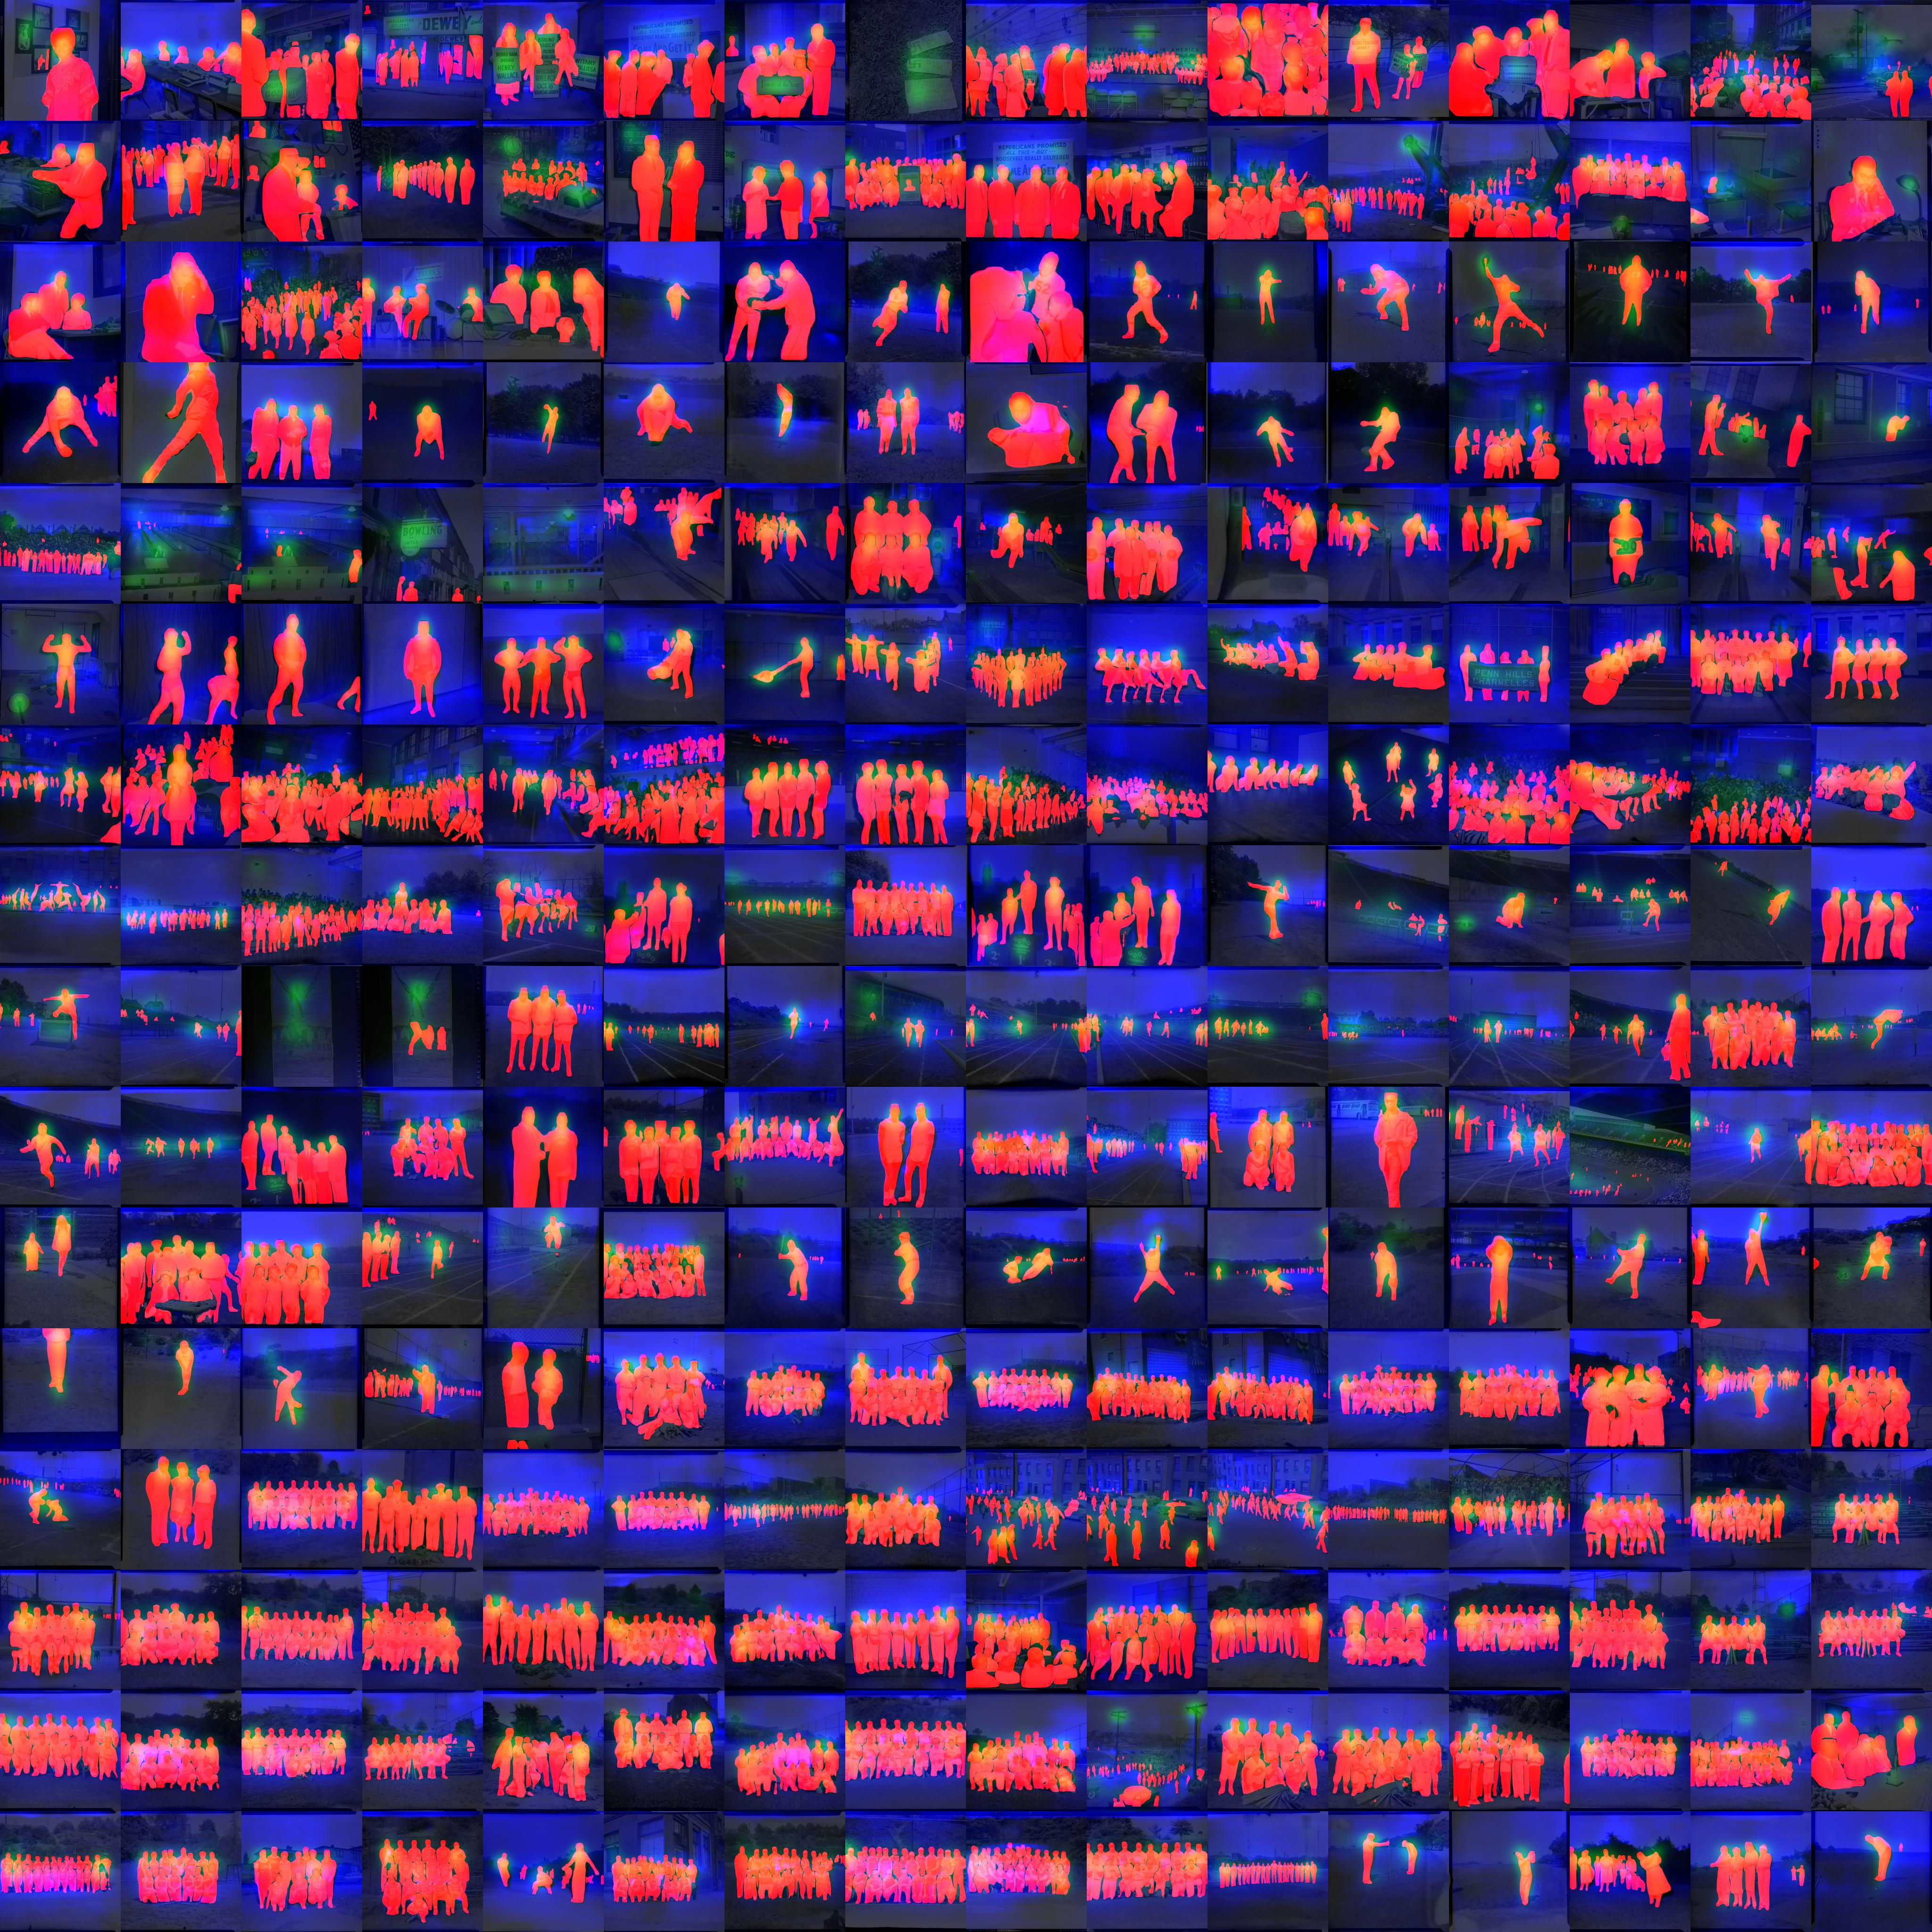

In [17]:
tex = photos * 0.25 # tex brightness
tex = np.expand_dims(tex, axis=-1)
labels = np.dstack((detectron, saliency, depth))
result = tex.astype(float) + labels.astype(float)
result = np.clip(result, 0, 255)
imshow(result, fmt='jpg')